<a href="https://colab.research.google.com/github/NihalAhmadKhan/sales-forecasting-of-pharmaceutical-products-using-python/blob/main/sales_forecasting_of_pharmaceuticals_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import xgboost as xgb
from xgboost import plot_importance, plot_tree


In [ ]:
df_monthly = pd.read_csv("./salesmonthly.csv.xls")
df_monthly.head(10)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7
5,2014-06-30,112.07,94.710,122.900,548.225,323.0,23.0,57.0,109.3
6,2014-07-31,117.06,95.010,129.300,491.900,348.0,21.0,61.0,69.1
7,2014-08-31,134.79,99.780,123.800,583.850,420.0,29.0,37.0,70.8
8,2014-09-30,108.78,109.094,122.100,887.820,399.0,14.0,115.0,58.8
9,2014-10-31,154.75,185.241,191.600,1856.815,472.0,30.0,182.0,74.5


In [ ]:
df_monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571
std,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000
50%,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000
75%,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [ ]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   70 non-null     object 
 1   M01AB   70 non-null     float64
 2   M01AE   70 non-null     float64
 3   N02BA   70 non-null     float64
 4   N02BE   70 non-null     float64
 5   N05B    70 non-null     float64
 6   N05C    70 non-null     float64
 7   R03     70 non-null     float64
 8   R06     70 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [ ]:
for col in df_monthly.columns:
    df_monthly = df_monthly[df_monthly[col] != 0]
df_monthly = df_monthly.reset_index(drop=True)

In [ ]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   69 non-null     object 
 1   M01AB   69 non-null     float64
 2   M01AE   69 non-null     float64
 3   N02BA   69 non-null     float64
 4   N02BE   69 non-null     float64
 5   N05B    69 non-null     float64
 6   N05C    69 non-null     float64
 7   R03     69 non-null     float64
 8   R06     69 non-null     float64
dtypes: float64(8), object(1)
memory usage: 5.0+ KB


In [ ]:
df_monthly.describe()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,152.165797,118.202899,116.687812,905.477464,265.902899,18.101449,170.105072,87.918551
std,25.889420,24.222290,28.165372,323.448143,79.526993,8.260724,79.780194,44.966193
min,44.370000,37.300000,20.650000,295.150000,86.000000,5.000000,37.000000,11.130000
25%,137.640000,103.522000,97.000000,649.800000,226.000000,12.000000,112.000000,51.000000
50%,154.750000,114.961000,117.750000,867.899000,250.600000,18.000000,161.000000,74.500000
75%,169.320000,128.402000,133.850000,1062.686000,295.200000,23.000000,219.000000,120.800000
max,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000


In [ ]:
month = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
df_monthly["mon"] = 0
df_monthly["path"] = "0"
for i, line in enumerate(df_monthly["datum"]):
  df_monthly["mon"][i] = month[int(line.split("-")[1]) - 1]
  df_monthly["path"][i] = str(line.split("-")[0])
df_monthly.head()

<ipython-input-8-5a6fcf5a003d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["mon"][i] = month[int(line.split("-")[1]) - 1]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-8-5a6fcf5a003d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly["path"][i] = str(line.split("-")[0])


,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mon,path
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,january,2014
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,february,2014
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,march,2014
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,april,2014
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,may,2014


In [ ]:
df_monthly.drop(["datum"], inplace=True, axis=1)
df_monthly.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mon,path
0,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2,january,2014
1,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2,february,2014
2,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4,march,2014
3,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7,april,2014
4,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7,may,2014


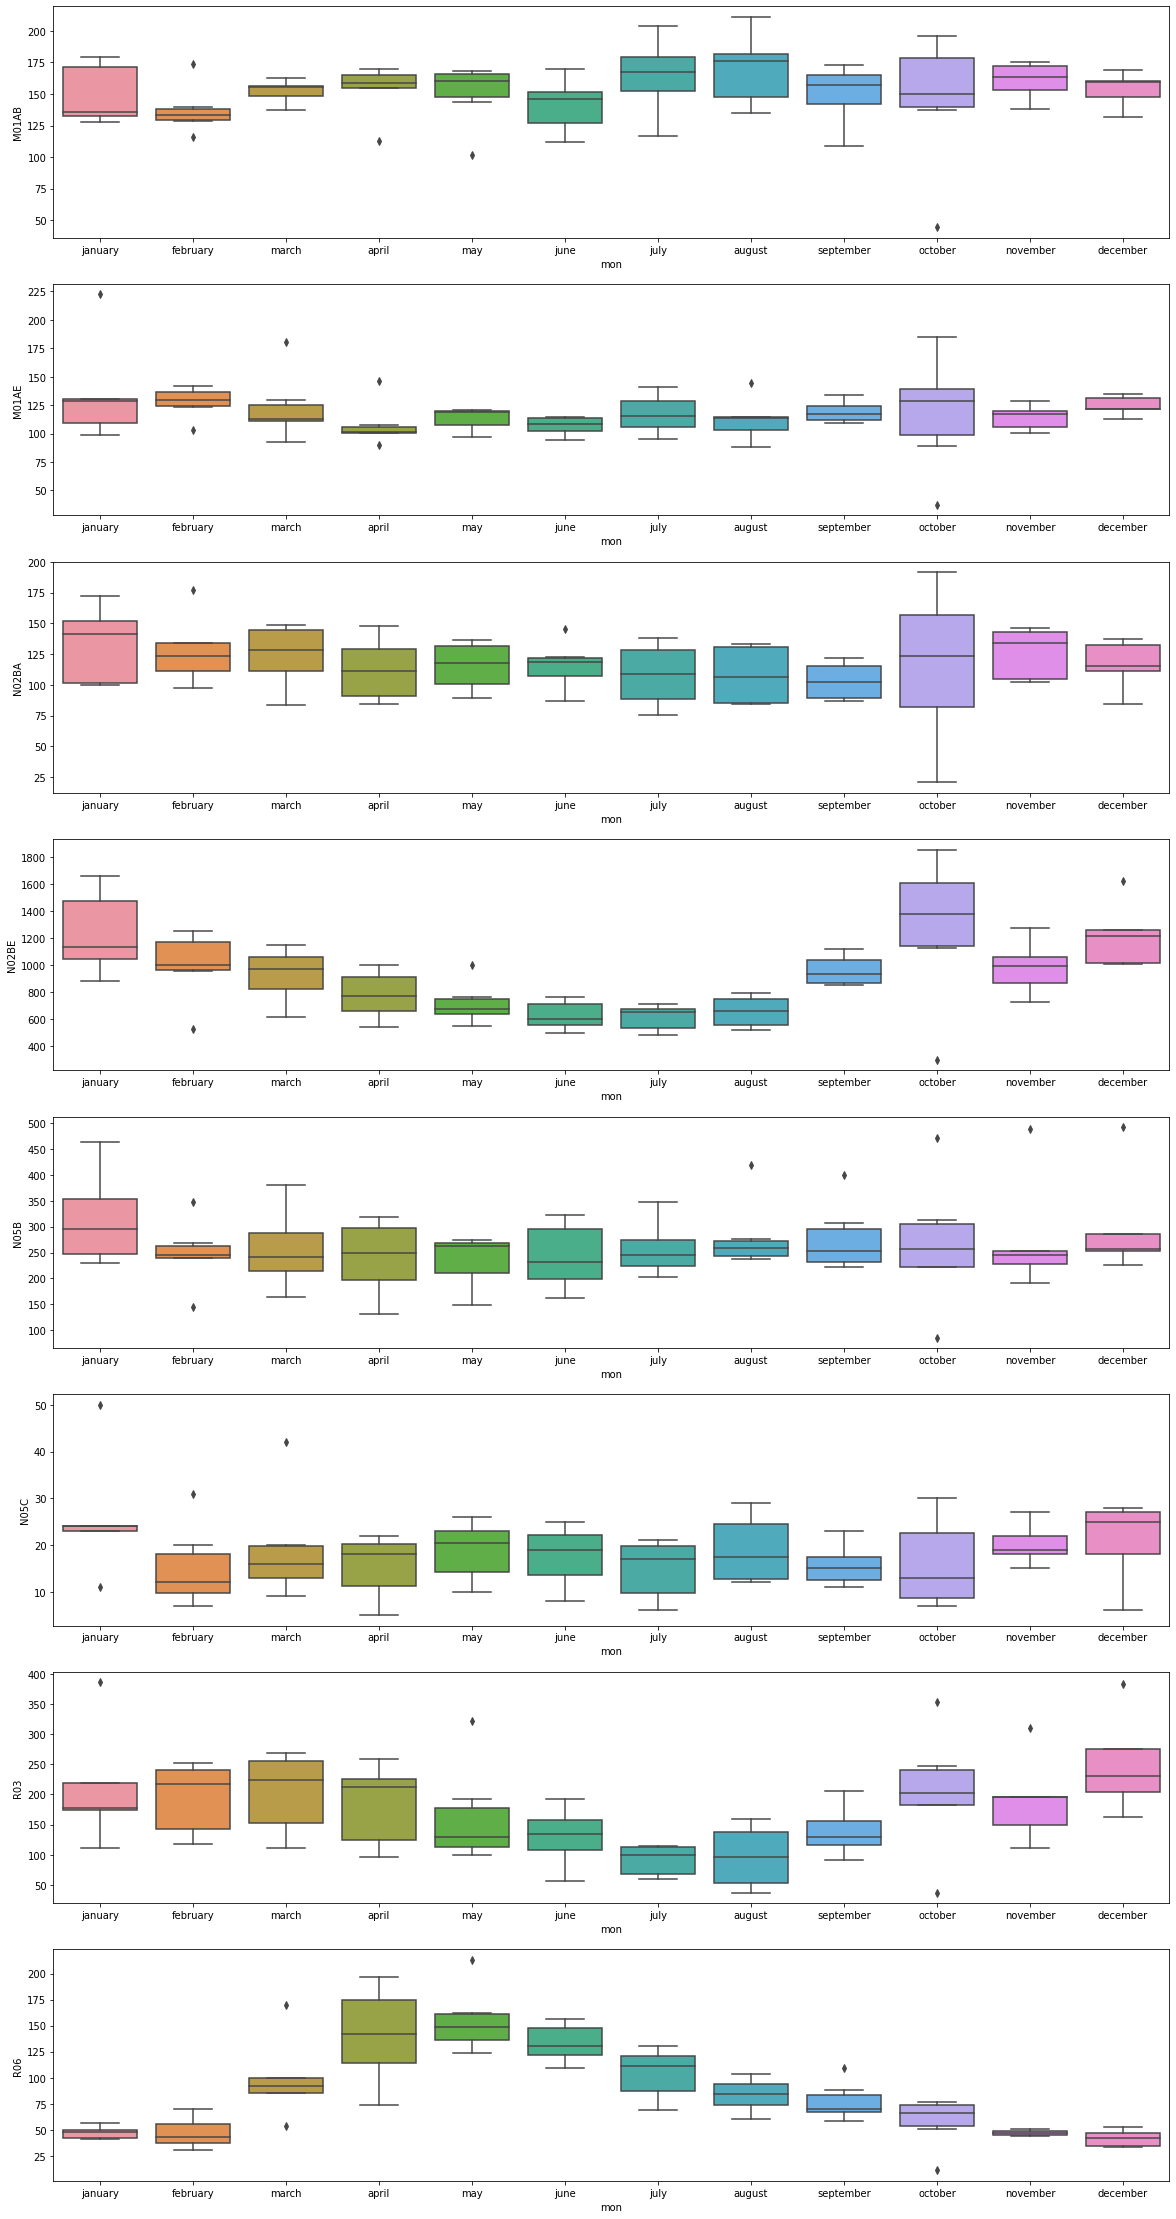

In [ ]:
fig, axes = plt.subplots(8, 1, figsize=(20, 40))
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_monthly, x="mon", y=name, ax=ax)




In [ ]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 2.75
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items())
    return multiple_outliers

In [ ]:
categories = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
df_monthly.loc[detect_outliers(df_monthly,categories)]

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mon,path
68,44.37,37.300,20.650,295.150,86.0,7.0,37.0,11.13,october,2019
59,179.70,222.351,99.700,1660.612,295.2,23.0,386.0,41.30,january,2019
10,138.08,100.860,142.700,723.800,489.0,19.0,112.0,45.20,november,2014
11,131.90,121.401,111.124,1015.660,492.0,25.0,163.0,33.40,december,2014


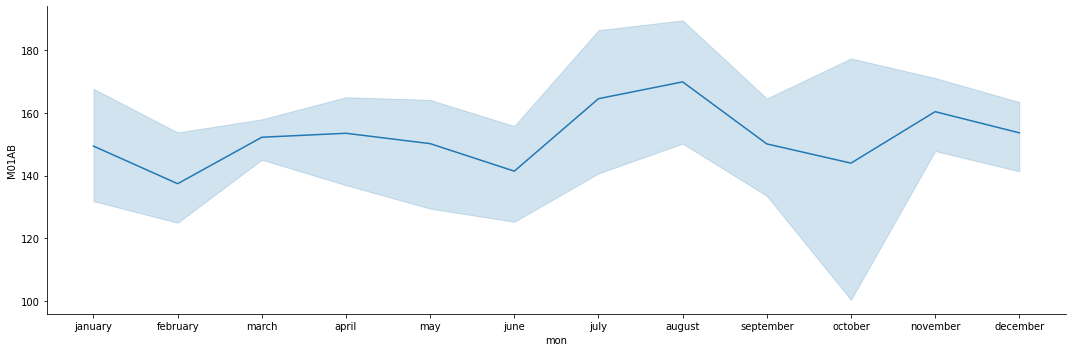

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='M01AB', palette="flare", aspect=3)

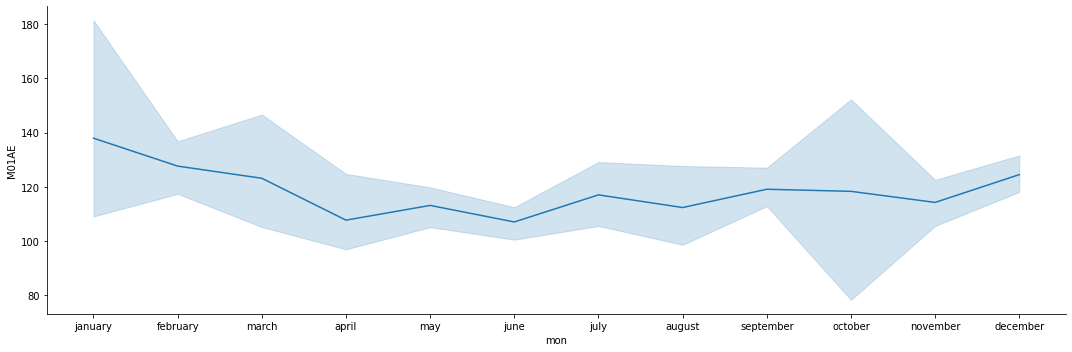

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='M01AE', palette="flare", aspect=3)

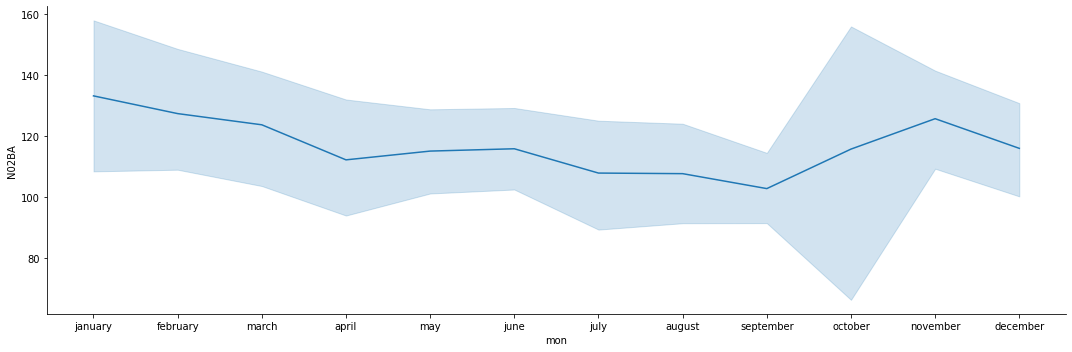

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='N02BA', palette="flare", aspect=3)

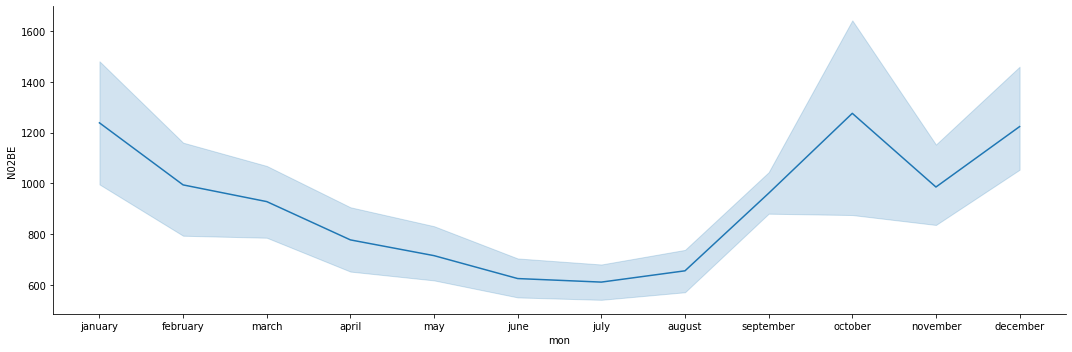

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='N02BE', palette="flare", aspect=3)

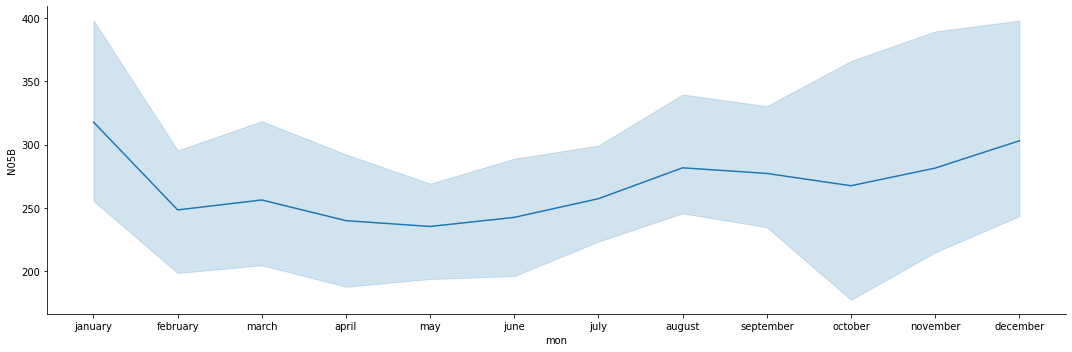

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='N05B', palette="flare", aspect=3)

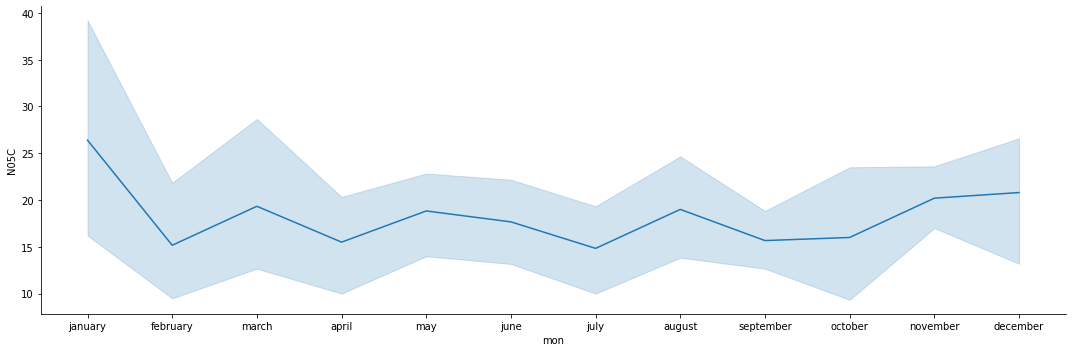

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='N05C', palette="flare", aspect=3)

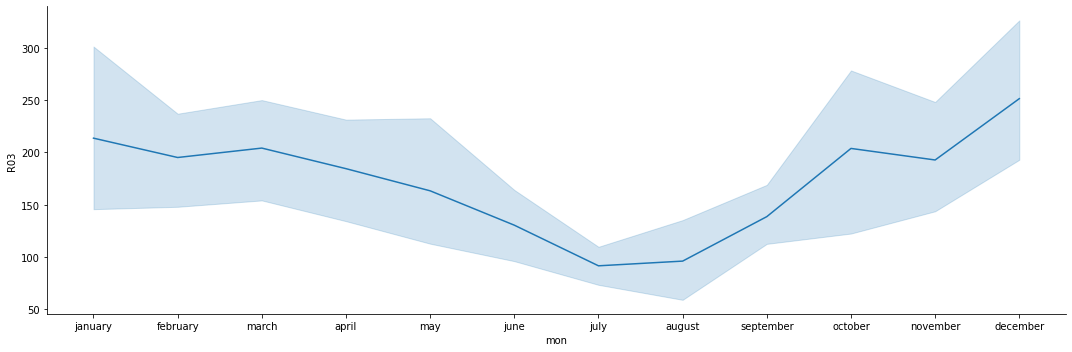

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='R03', palette="flare", aspect=3)

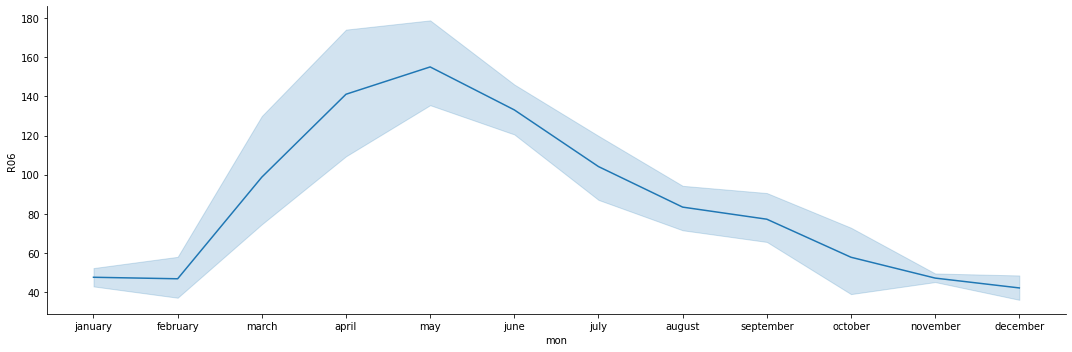

In [ ]:
sns.relplot(kind='line', data=df_monthly, x='mon', y='R06', palette="flare", aspect=3)

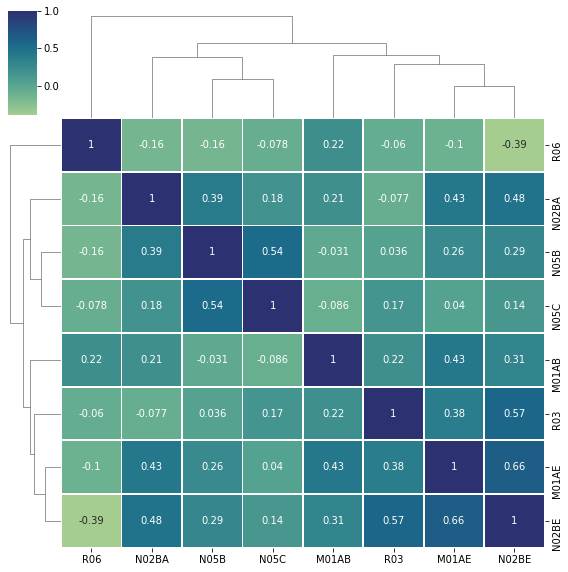

In [ ]:
sns.clustermap(df_monthly.corr(), dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = 0.8, figsize = (8, 8), cmap="crest")
plt.show()

**Weekly forecast for pharmaceutical products**

**Future Sales Forecast for M01AB Class**

In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axis = 1)
# outliers found will be discarded from our dataset.
df = df.drop(detect_outliers(df,["M01AB"]),axis=0)

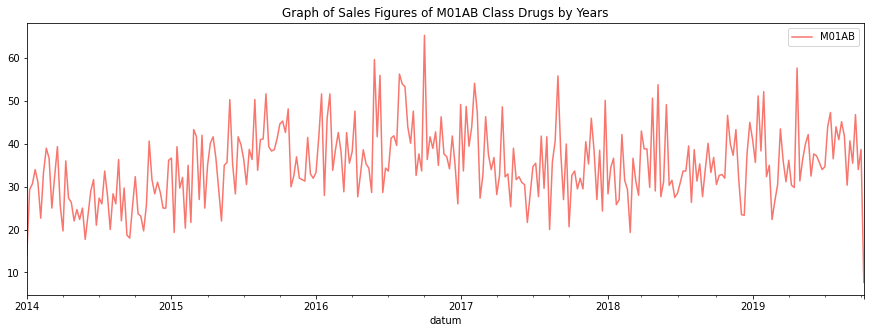

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of M01AB Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

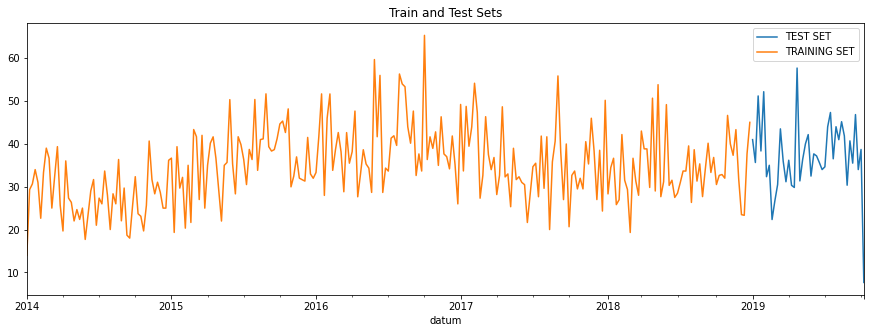

In [ ]:
_ = df_test \
    .rename(columns={'M01AB': 'TEST SET'}) \
    .join(df_train.rename(columns={'M01AB': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear

    X = df[['quarter','month','year',
           ]]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(df_train, label='M01AB')
X_test, y_test = create_features(df_test, label='M01AB')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

[09:40:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
from xgboost.sklearn import XGBRegressor
from numpy import nan
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

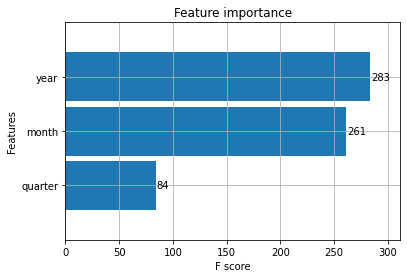

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['M01AB_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

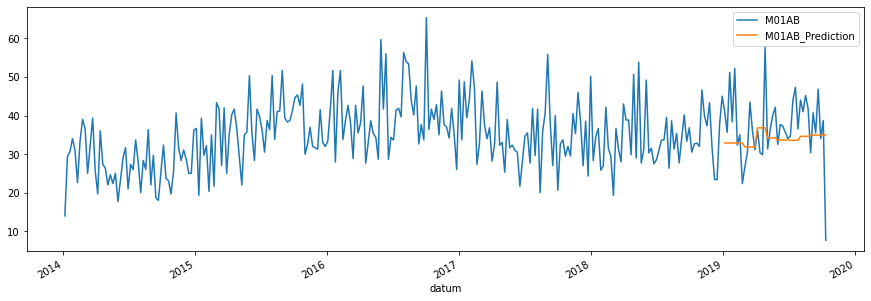

In [ ]:
_ = df_all[['M01AB','M01AB_Prediction']].plot(figsize=(15, 5))

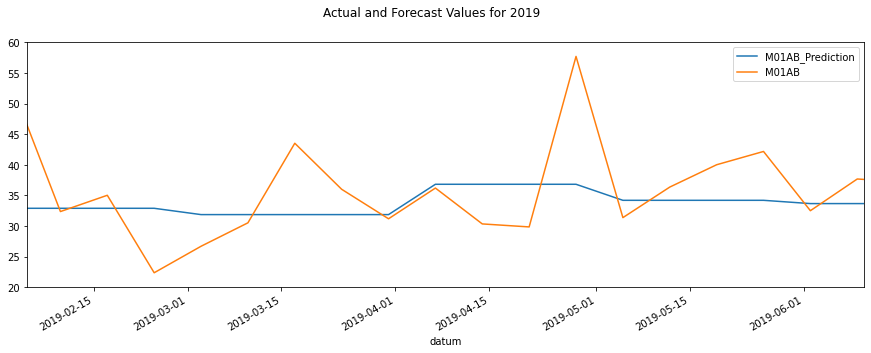

In [ ]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['M01AB_Prediction','M01AB']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(20, 60)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for M01AE Class**

In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','N02BE', 'N05B','N05C','R03','R06'], axis = 1)
#df = df.drop(detect_outliers(df,["M01AE"]),axis=0)

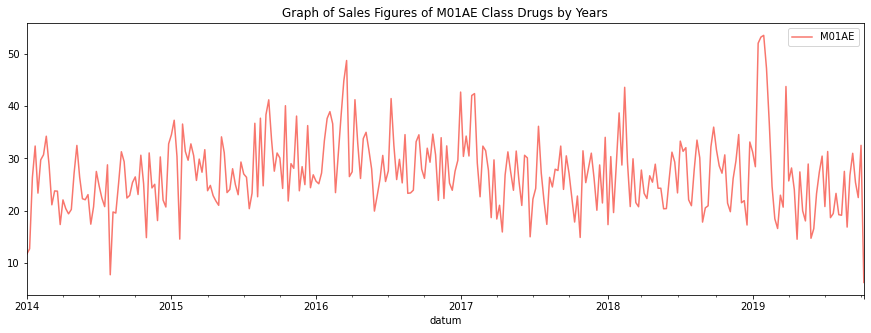

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of M01AE Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

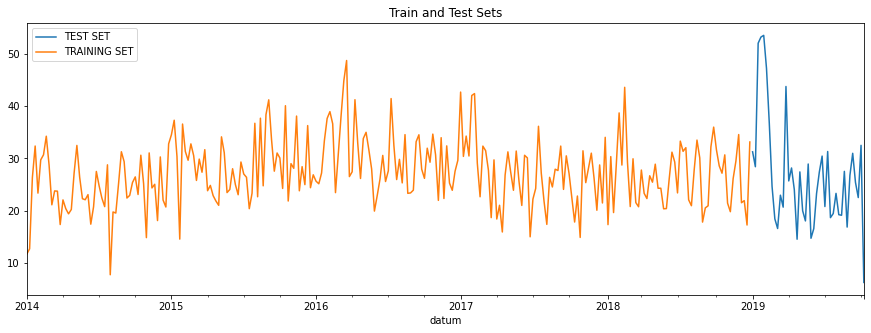

In [ ]:
_ = df_test \
    .rename(columns={'M01AE': 'TEST SET'}) \
    .join(df_train.rename(columns={'M01AE': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='M01AE')
X_test, y_test = create_features(df_test, label='M01AE')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:42:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

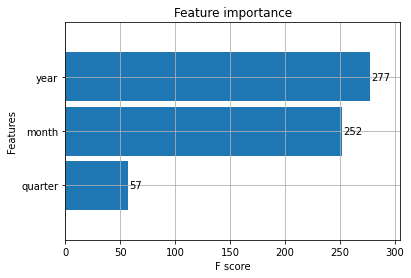

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['M01AE_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

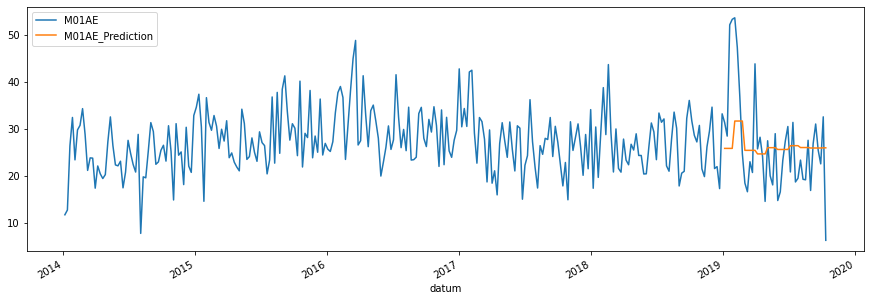

In [ ]:
_ = df_all[['M01AE','M01AE_Prediction']].plot(figsize=(15, 5))

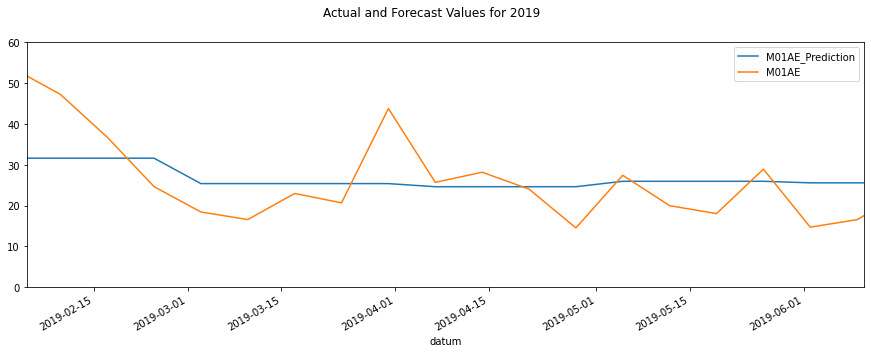

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['M01AE_Prediction','M01AE']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(0, 60)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for N02BA Class**


In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','M01AE','N02BE', 'N05B','N05C','R03','R06'], axis = 1)

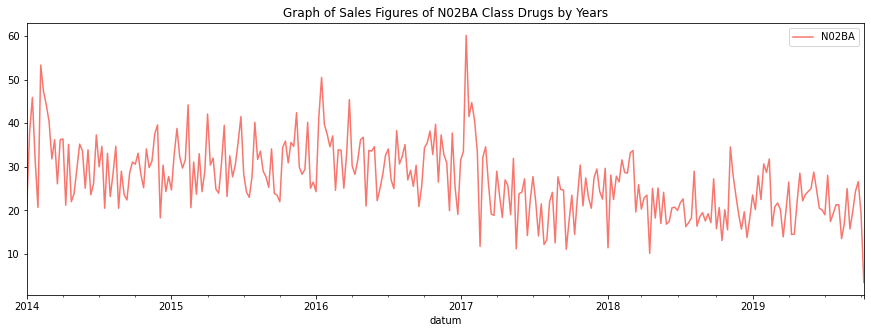

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N02BA Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

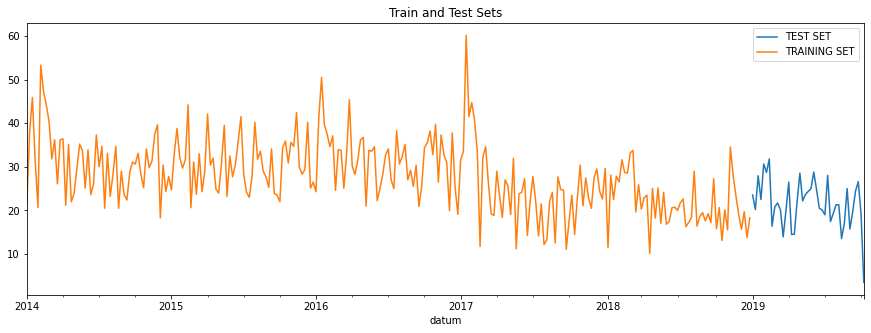

In [ ]:
_ = df_test \
    .rename(columns={'N02BA': 'TEST SET'}) \
    .join(df_train.rename(columns={'N02BA': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='N02BA')
X_test, y_test = create_features(df_test, label='N02BA')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:42:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

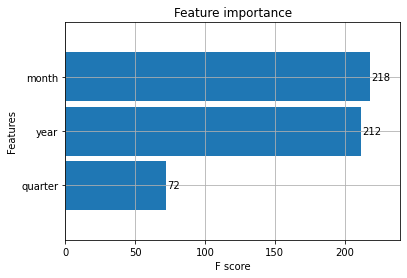

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['N02BA_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

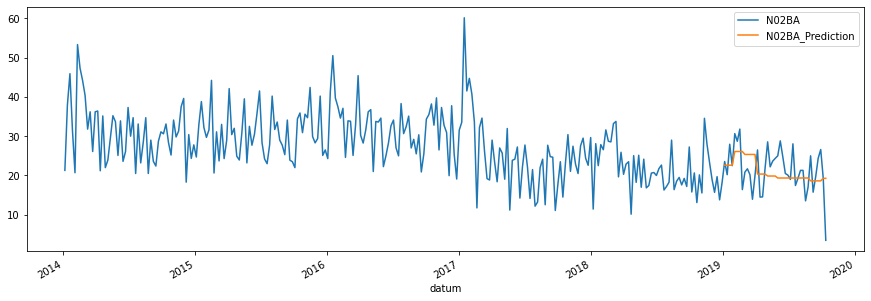

In [ ]:
_ = df_all[['N02BA','N02BA_Prediction']].plot(figsize=(15, 5))

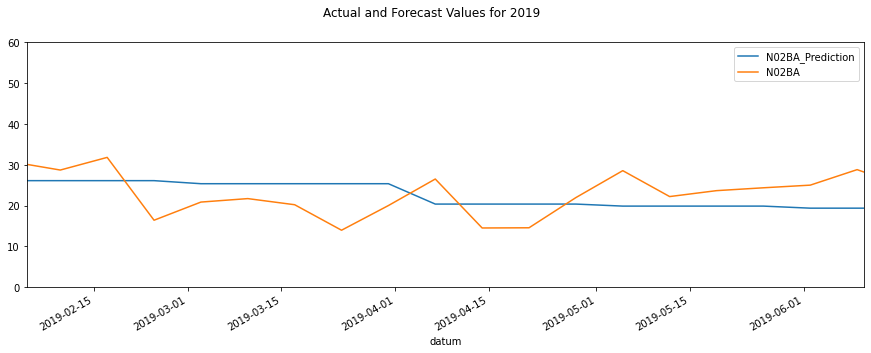

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N02BA_Prediction','N02BA']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(0, 60)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for N02BE Class**

In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','M01AE', 'N05B','N05C','R03','R06'], axis = 1)

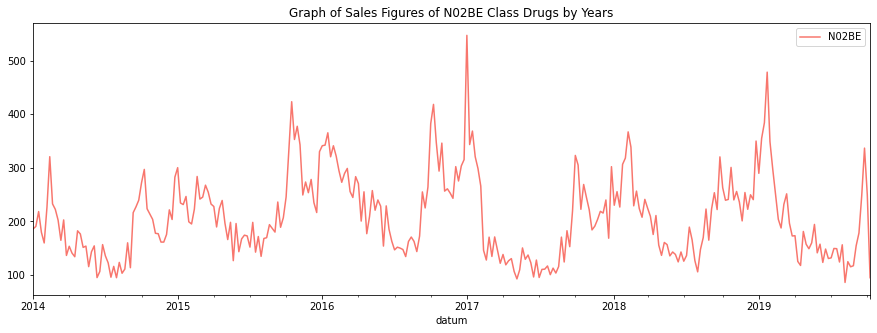

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N02BE Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

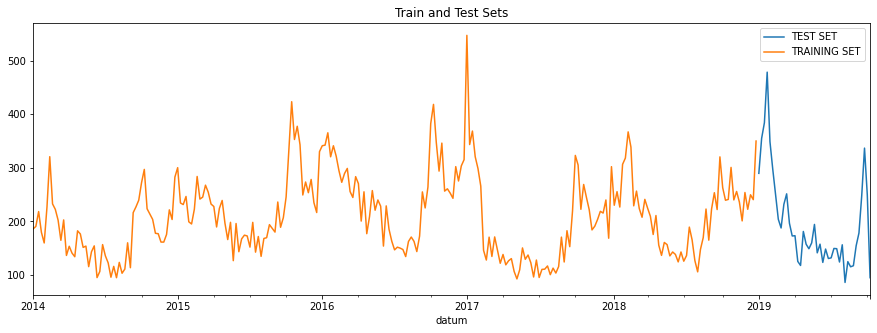

In [ ]:
_ = df_test \
    .rename(columns={'N02BE': 'TEST SET'}) \
    .join(df_train.rename(columns={'N02BE': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='N02BE')
X_test, y_test = create_features(df_test, label='N02BE')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:43:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

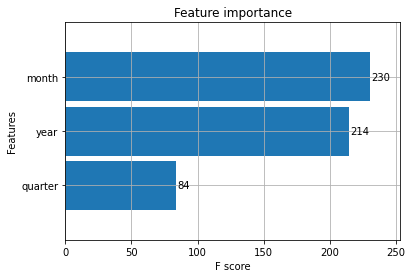

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['N02BE_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

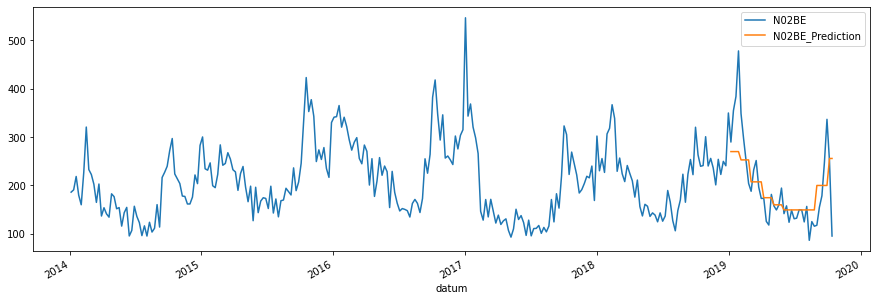

In [ ]:
_ = df_all[['N02BE','N02BE_Prediction']].plot(figsize=(15, 5))

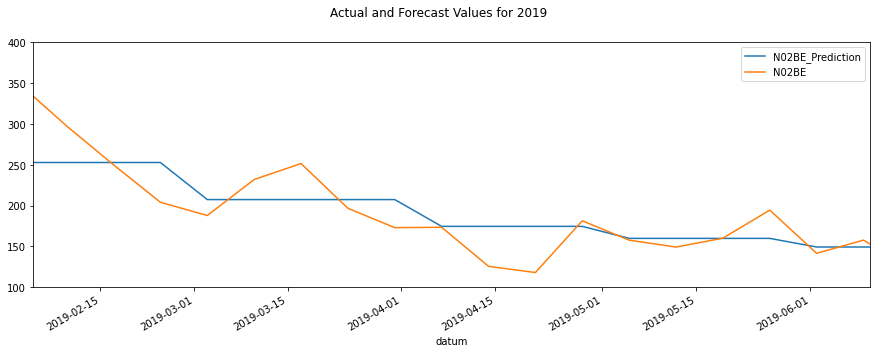

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N02BE_Prediction','N02BE']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(100, 400)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for N05B Class**


In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','M01AE', 'N02BE','N05C','R03','R06'], axis = 1)

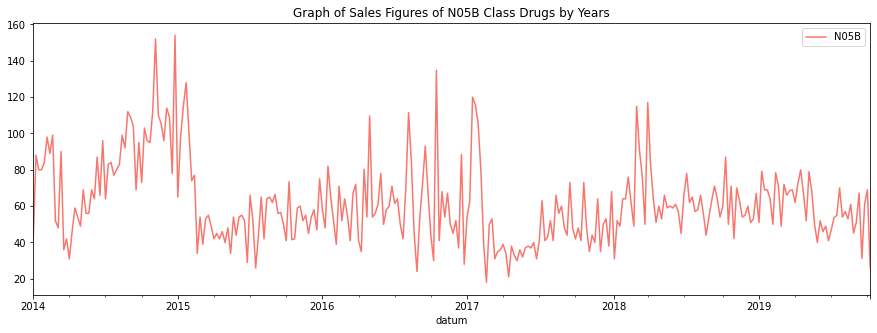

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N05B Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

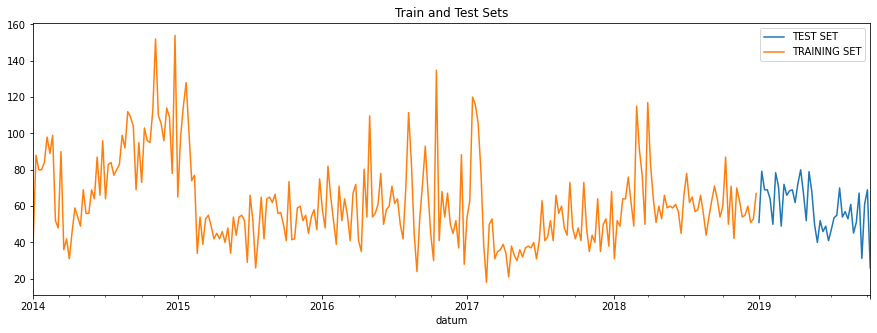

In [ ]:
_ = df_test \
    .rename(columns={'N05B': 'TEST SET'}) \
    .join(df_train.rename(columns={'N05B': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='N05B')
X_test, y_test = create_features(df_test, label='N05B')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:44:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

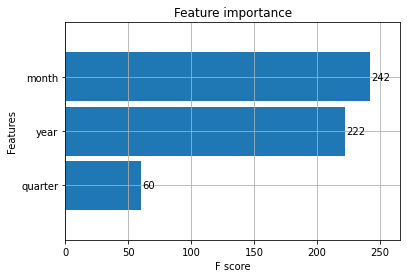

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['N05B_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

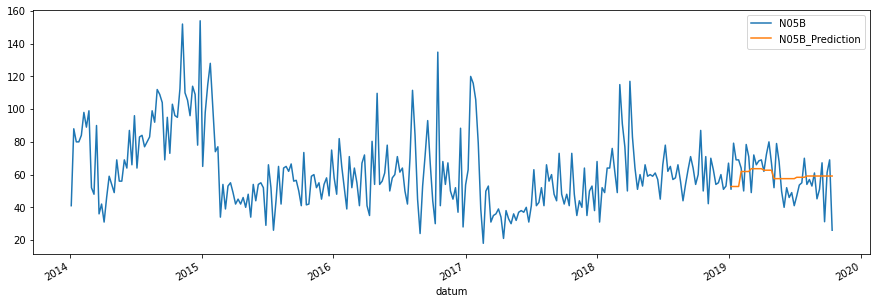

In [ ]:
_ = df_all[['N05B','N05B_Prediction']].plot(figsize=(15, 5))

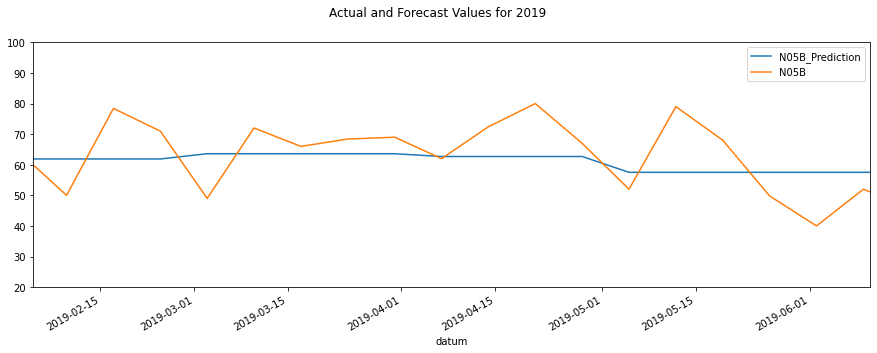

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N05B_Prediction','N05B']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(20, 100)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for N05C Class**

In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','M01AE', 'N02BE','N05B','R03','R06'], axis = 1)

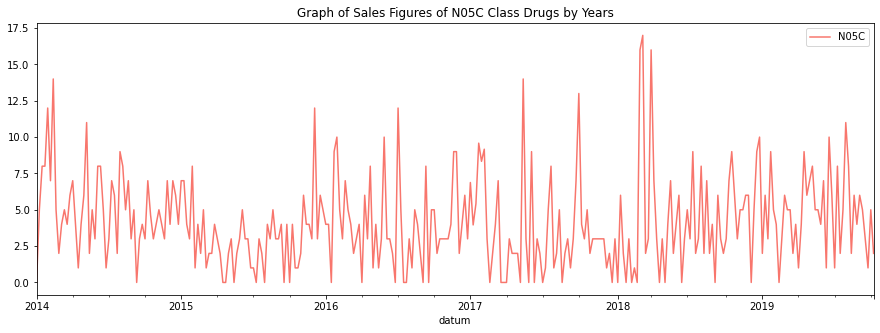

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of N05C Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

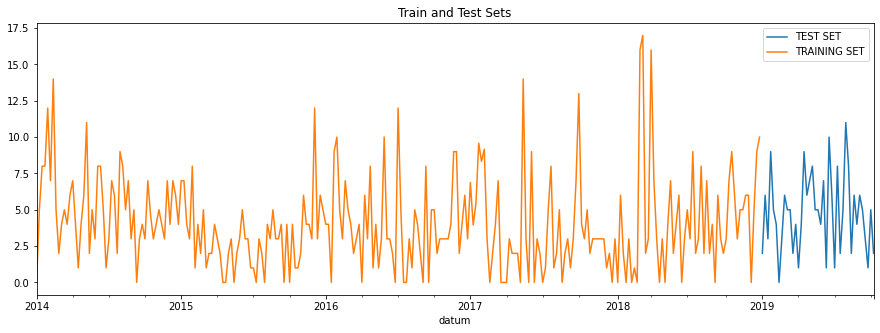

In [ ]:
_ = df_test \
    .rename(columns={'N05C': 'TEST SET'}) \
    .join(df_train.rename(columns={'N05C': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='N05C')
X_test, y_test = create_features(df_test, label='N05C')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:51:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

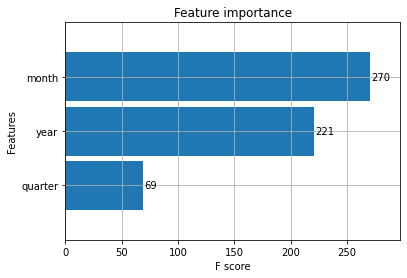

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['N05C_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

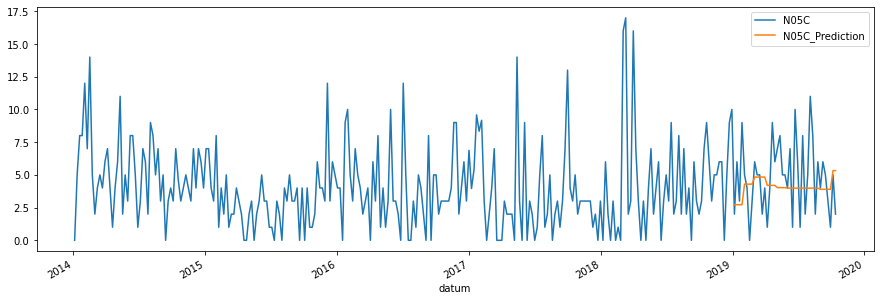

In [ ]:
_ = df_all[['N05C','N05C_Prediction']].plot(figsize=(15, 5))

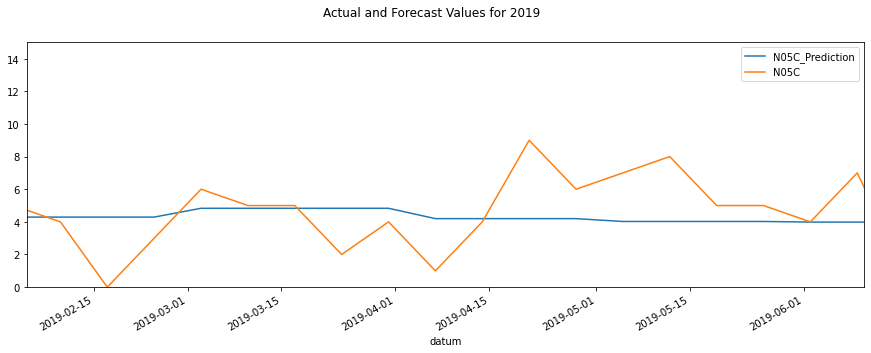

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['N05C_Prediction','N05C']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(0,15)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for R03 Class**

In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','M01AE', 'N05B','N05C','N02BE','R06'], axis = 1)

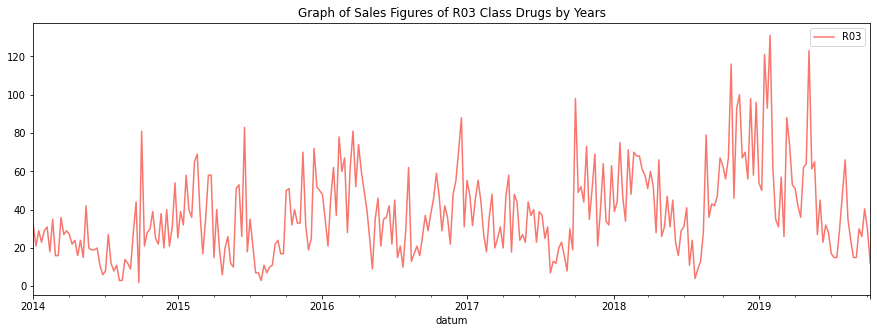

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of R03 Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

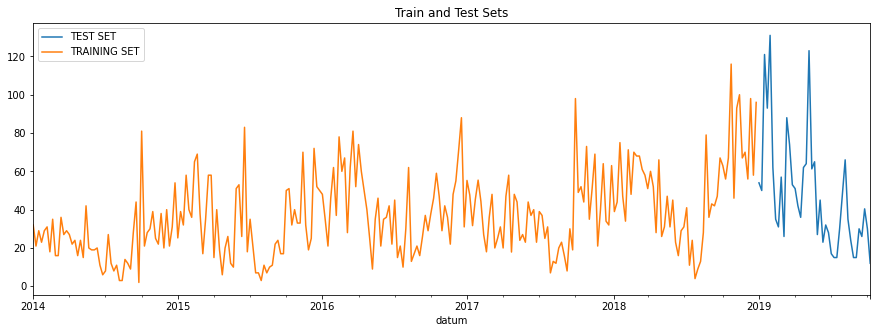

In [ ]:
_ = df_test \
    .rename(columns={'R03': 'TEST SET'}) \
    .join(df_train.rename(columns={'R03': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='R03')
X_test, y_test = create_features(df_test, label='R03')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:46:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

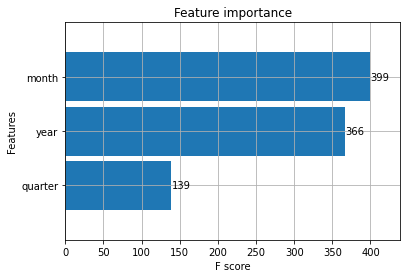

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['R03_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

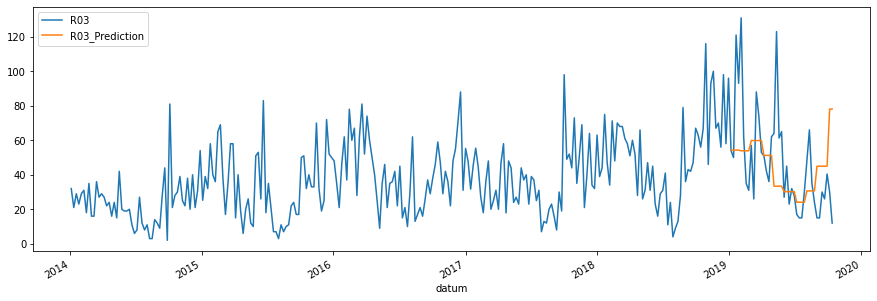

In [ ]:
_ = df_all[['R03','R03_Prediction']].plot(figsize=(15, 5))

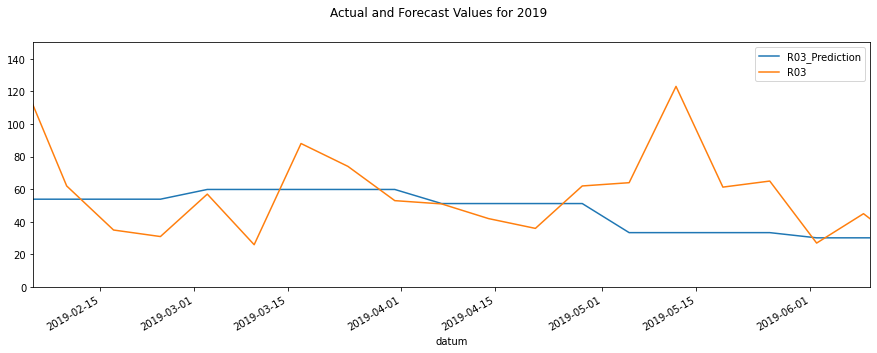

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['R03_Prediction','R03']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(0, 150)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')

**Future Sales Forecast for R06 Class**

In [ ]:
df = pd.read_csv("./salesweekly (1).csv.xls", index_col=[0], parse_dates=[0])
df = df.drop(['M01AB','N02BA','M01AE', 'N05B','N05C','N02BE','R03'], axis = 1)

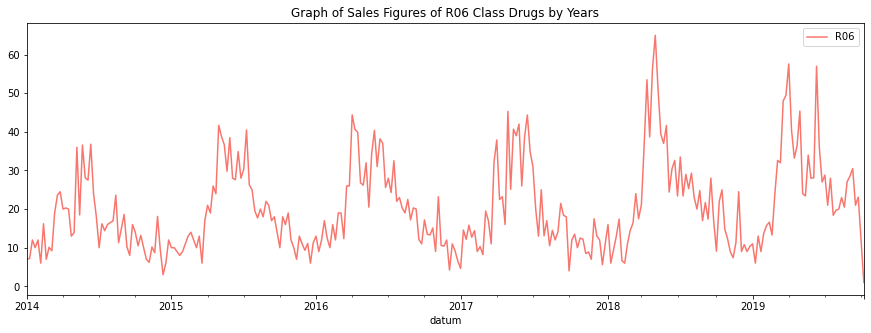

In [ ]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = df.plot(style='-', figsize=(15,5), color=color_pal[0], title='Graph of Sales Figures of R06 Class Drugs by Years')

In [ ]:
split_date = '01-Jan-2019'
df_train = df.loc[df.index <= split_date].copy()
df_test = df.loc[df.index > split_date].copy()

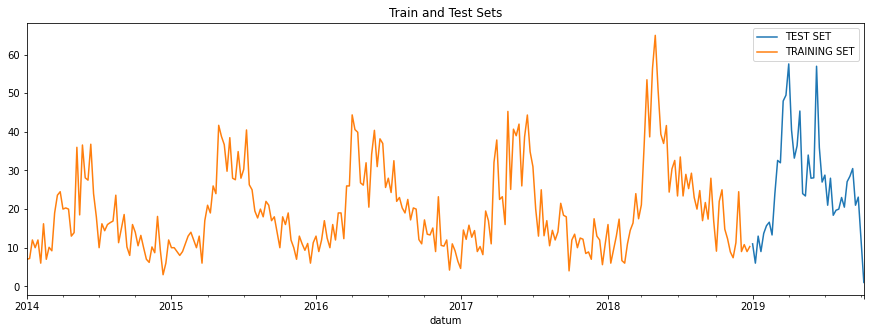

In [ ]:
_ = df_test \
    .rename(columns={'R06': 'TEST SET'}) \
    .join(df_train.rename(columns={'R06': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Train and Test Sets', style='-')

In [ ]:
X_train, y_train = create_features(df_train, label='R06')
X_test, y_test = create_features(df_test, label='R06')

<ipython-input-26-7eaf2cf87757>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [ ]:
X_train.head()

,quarter,month,year
datum,,,
2014-01-05,1,1,2014
2014-01-12,1,1,2014
2014-01-19,1,1,2014
2014-01-26,1,1,2014
2014-02-02,1,2,2014


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[09:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [ ]:
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1)

XGBRegressor(callbacks=None, early_stopping_rounds=None,
             enable_categorical=False, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_depth=6, max_leaves=0, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             predictor='auto')

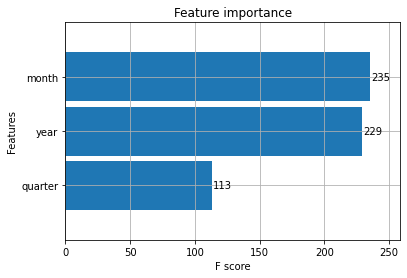

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
df_test['R06_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

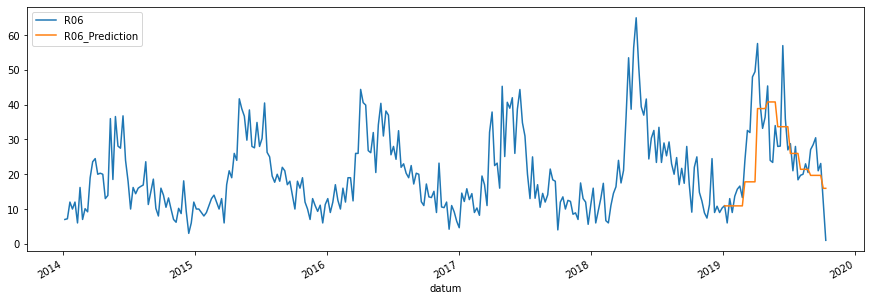

In [ ]:
_ = df_all[['R06','R06_Prediction']].plot(figsize=(15, 5))

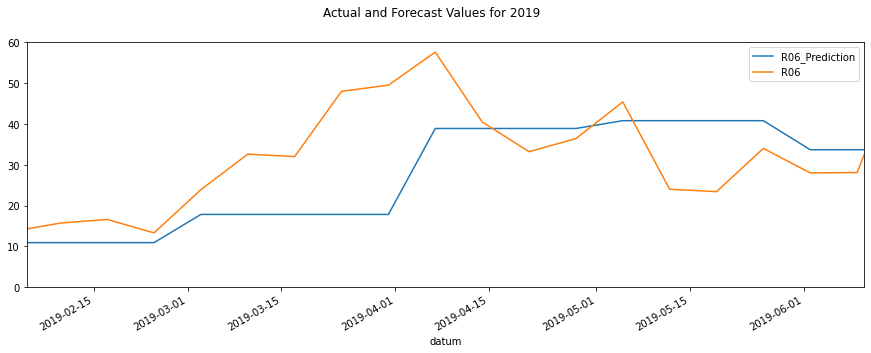

In [ ]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['R06_Prediction','R06']].plot(ax=ax,style=['-','-'])
ax.set_xbound(lower='02-05-2019', upper='06-10-2019')
ax.set_ylim(0, 60)
plot = plt.suptitle('Actual and Forecast Values ​​for 2019')